# Checkpoint 1 - Data Cleaning 1

### Reading the files and storing the result in two DataFrames : companies and rounds2


In [352]:
#Load the companies and rounds data into two data frames and name them companies and rounds2 respectively
import pandas as pd
companies = pd.read_csv('./IIITB/InvestmentAssignment/companies.txt', encoding = "ISO-8859-1", sep="\t", names=["permalink", "name", "homepage_url", "category_list","status","country_code","state_code","region","city","founded_at"])
companies.drop(companies.index[0],inplace=True) #removing the first row as it is header
rounds2 = pd.read_csv('./IIITB/InvestmentAssignment/rounds2.csv',encoding = "ISO-8859-5", sep=",",names=["company_permalink","funding_round_permalink","funding_round_type","funding_round_code","funding_at","raised_amount_usd"])
rounds2.drop(rounds2.index[0],inplace=True) #removing the first row as it is header
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funding_at,raised_amount_usd
1,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000
2,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000
4,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878
5,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000


### How many unique companies are present in rounds2?
Answer - 90247

In [353]:
len(rounds2['company_permalink'].unique().tolist())



90247

### How many unique companies are present in the companies file?
Answer - 66368

In [354]:
len(companies['permalink'].unique().tolist())

66368

### Are there any companies in the rounds2 file which are not  present in companies ? 
Answer Y . There are 74 such companies

In [355]:
rounds2InCompanies=rounds2.company_permalink.str.lower().isin(companies.permalink.str.lower())

countFalseValues=lambda x: 1 if x==False else 0
rounds2InCompanies.apply(countFalseValues).sum() # sum the values where countFalseValues is 1



74

### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

Answer - 114875

In [356]:
#Changing the column name of company_permalink to permalink , so that we have a key to merge the Dataframes
rounds2.rename(columns={"company_permalink":"permalink"},inplace = True) 
companies['permalink'] = companies['permalink'].str.lower()
rounds2['permalink'] = rounds2['permalink'].str.lower()
master_frame = pd.merge(companies, rounds2, how='inner', on='permalink')
print(len(master_frame))
master_frame.count()



114875


permalink                  114875
name                       114874
homepage_url               108749
category_list              111488
status                     114875
country_code               106238
state_code                 103972
region                     104749
city                       104752
founded_at                  94387
funding_round_permalink    114875
funding_round_type         114875
funding_round_code          31132
funding_at                 114875
raised_amount_usd           94915
dtype: int64

### Since the count of non null values for funding_round_code and  is less than 60% of the length of the master_frame , thus we are dropping the column

In [357]:
master_frame.drop('funding_round_code',axis=1,inplace=True)


# Checkpoint 2: Funding Type Analysis

### Average funding amount of venture type


In [358]:
master_frame.fillna(0,inplace=True)
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].astype(float)
funding_round_type_venture=master_frame['funding_round_type']=='venture'
mean_for_venture_type = master_frame.loc[funding_round_type_venture, 'raised_amount_usd'].mean()
print(mean_for_venture_type)

10635651.472583726


### Average funding amount of angel type

In [359]:
funding_round_type_angel=master_frame['funding_round_type']=='angel'
mean_for_angel_type=master_frame.loc[funding_round_type_angel,'raised_amount_usd'].mean()
print(mean_for_angel_type)

764940.9165982597


### Average funding amount of seed type

In [360]:
funding_round_type_seed=master_frame['funding_round_type']=='seed'
mean_for_seed_type=master_frame.loc[funding_round_type_seed,'raised_amount_usd'].mean()
print(mean_for_seed_type)

556818.210553934


### Average funding type of private equity type

In [361]:
funding_round_type_private_equity=master_frame['funding_round_type']=='private_equity'
mean_for_private_equity_type=master_frame.loc[funding_round_type_private_equity,'raised_amount_usd'].astype(float).mean()
print(mean_for_private_equity_type)

62134732.25350263


### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

Answer : Venture . Code shared below 

In [362]:
# Storing the means in a list in the same order as mentioned in the dictionary
dict_fundingType={0:"venture",1:"angel",2:"seed",3:"private_equity"}
#defining a lambda function withing range to identify whether the investment is between 5-15 million
withinrange=lambda x: 1 if (x>5000000 and x<15000000 )else 0
list_fundingType_means=[mean_for_venture_type,mean_for_angel_type,mean_for_seed_type,mean_for_private_equity_type]
greater=list_fundingType_means[0]
index=0
for x in list_fundingType_means:
    if withinrange(x)==1 and x>greater :
        greater=x
        index=x.index()

print(dict_fundingType[index]) #printing the value of the index that meets the business criterian mentioned above

        
        


venture


# Checkpoint 3: Country Analysis

In [363]:
condition= master_frame.country_code!=0  # data Cleaning - removing the rows where country_code is 0 
master_frame.where(cond=condition,inplace=True)

top9=pd.DataFrame(master_frame.groupby(['country_code']).raised_amount_usd.sum())
top9.sort_values(by='raised_amount_usd',ascending=False,inplace=True)
top9=top9.head(9)
population = [325719178,0,66040229,1247540000,35985751,0,0,8051200,0]
top9['population']=population
top9.sort_values(by='population',ascending=False,inplace=True)
top9.head(3)



,raised_amount_usd,population
country_code,,
IND,2.768634e+10,1247540000
USA,6.694814e+11,325719178
GBR,3.276689e+10,66040229


# Checkpoint 4: Sector Analysis 1

In [364]:
mapping = pd.read_csv('./IIITB/InvestmentAssignment/mapping.csv', encoding = "ISO-8859-1", sep=",", names=["category_list","Automotive & Sports","Blanks","Cleantech / Semiconductors","Entertainment","Health,Manufacturing","News, Search and Messaging","Others","Social, Finance, Analytics", "Advertising" ])

mapping.head()

mapping.drop([0,1],inplace=True) # dropping header and blank column 
mapping.insert(10, "primary_sector", "") #inserting a new column primary_sector

#Storing the values of the primary sector for corresponding list in the column primary_sector
for i in range(2, len(mapping)):
    for col in mapping.columns:
        if (mapping.at[i,col]=="1"):
            mapping.at[i,"primary_sector"]=col

#dropping the other columns exccept category_list and primary_sector
categoryListMappedToPrimarySector=mapping.drop(["Automotive & Sports","Blanks","Cleantech / Semiconductors","Entertainment","Health,Manufacturing","News, Search and Messaging","Others","Social, Finance, Analytics", "Advertising"],axis=1)
categoryListMappedToPrimarySector.head()


,category_list,primary_sector
2,3D,"News, Search and Messaging"
3,3D Printing,"News, Search and Messaging"
4,3D Technology,"News, Search and Messaging"
5,Accounting,Advertising
6,Active Lifestyle,"Health,Manufacturing"


# Checkpoint 5: Sector Analysis 2

In [365]:
master_frame=master_frame[(master_frame.funding_round_type=='venture')|(master_frame.funding_round_type=='angel')|(master_frame.funding_round_type=='seed')|(master_frame.funding_round_type=='private_equity')]
# filtering the master_frame to include only those rows where raised_amount_usd is in between 5-10 millions
master_frame=master_frame[(master_frame.raised_amount_usd>5000000) & (master_frame.raised_amount_usd<15000000)]
master_frame.head()

#Now applying the filter for the top 3 english speaking countries and storing the result in D1,D2,D3
D1=master_frame[(master_frame.country_code=='IND')] 
D2=master_frame[(master_frame.country_code=='USA')]
D3=master_frame[(master_frame.country_code=='GBR')]
D1 = pd.merge(D1,categoryListMappedToPrimarySector, how='inner', on='category_list')
D2=  pd.merge(D2,categoryListMappedToPrimarySector, how='inner', on='category_list')
D3=  pd.merge(D3,categoryListMappedToPrimarySector, how='inner', on='category_list')

#renaming category_list to main_sector
D1.rename(columns={"category_list":"main_sector"},inplace = True) 
D2.rename(columns={"category_list":"main_sector"},inplace = True) 
D3.rename(columns={"category_list":"main_sector"},inplace = True) 




#************Calculating the total investments and main_sector_counts *************

# Step 2 - Merge G1, G2, G3 with D1, D2 , D3 respectively 
# Step 2.1 - Dropping columns raised_amount_usd and main_sector_counts 
#           as they are already present in G1,G2 and G3 and will Duplicate if not dropped

G1 =D1.groupby('main_sector').sum()
G2 =D2.groupby('main_sector').sum()
G3 =D3.groupby('main_sector').sum()


D1=pd.merge(D1,G1,how='inner',on='main_sector')
D2=pd.merge(D2,G2,how='inner',on='main_sector')
D3=pd.merge(D3,G3,how='inner',on='main_sector')





In [366]:
#Making a data frame containing main_sector and there value counts 
series_mainsector_value_counts=D1['main_sector'].value_counts()
df_mainsector_value_counts=series_mainsector_value_counts.to_frame()
df_mainsector_value_counts.rename(columns={"main_sector":"main_sector_counts"},inplace = True) 
df_mainsector_value_counts['main_sector']=df_mainsector_value_counts.index


#merging the df_mainsector_value_counts data frame with the data frames D1 , D2 , D3 
D1=pd.merge(D1,df_mainsector_value_counts, how='inner', on='main_sector')
D2=pd.merge(D2,df_mainsector_value_counts, how='inner', on='main_sector')
D3=pd.merge(D3,df_mainsector_value_counts, how='inner', on='main_sector')
D1.rename(columns={"raised_amount_usd_x":"raised_amount_usd"},inplace = True)
D2.rename(columns={"raised_amount_usd_x":"raised_amount_usd"},inplace = True)
D3.rename(columns={"raised_amount_usd_x":"raised_amount_usd"},inplace = True)










### 5.1.1 Total number of Investments (count)



In [367]:
print("D1",D1.main_sector_counts.sum())
print("D2",D2.main_sector_counts.sum())
print("D3",D3.main_sector_counts.sum())


D1 942
D2 31865
D3 1919


### 5.1.2 Total amount of investment (USD)

In [368]:
print("D1",D1.raised_amount_usd.sum())
print("D2",D2.raised_amount_usd.sum())
print("D3",D3.raised_amount_usd.sum())

D1 1232398277.0
D2 39471517406.0
D3 2455655109.0


### 5.1.3  - 5.10 
#### Group by main_sector_counts and find the max(). 
#### Note that the main_sector_counts of the sectors are :
##### Software : 17
##### Ecommerce : 14
##### Mobile : 11

In [369]:
D1.groupby('main_sector_counts').max()

,permalink,name,main_sector,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funding_at,raised_amount_usd,primary_sector,raised_amount_usd_y
main_sector_counts,,,,,,,,,,,,,,
1,/organization/welcome-cure,Welcome Cure,Startups,operating,IND,7,New Delhi,Pilani,/funding-round/f5078f3a78b3f3f149be9bc105ec0214,venture,29-06-2015,13000000.0,"Social, Finance, Analytics",13000000.0
2,/organization/valyoo-technologies,Valyoo Technologies,Security,operating,IND,7,New Delhi,Noida,/funding-round/feed53766b4cc22aa6b85ee6d86c4071,venture,30-11-2015,14750000.0,"Social, Finance, Analytics",22750000.0
3,/organization/power2sme,Power2SME,Health Care,operating,IND,19,Mumbai,Mumbai,/funding-round/f7cb3e67a9efe87f7337146edff31a17,venture,24-07-2013,10000000.0,"Social, Finance, Analytics",26400000.0
4,/organization/yatra-online,Yatra,Travel,operating,IND,7,Thiruvananthapuram,Thiruvananthapuram,/funding-round/e1391efe0df02c13bb587907c059c081,venture,31-07-2015,14500000.0,"Social, Finance, Analytics",37900000.0
5,/organization/tutorvista-com,iProf Learning Solutions,Education,operating,IND,36,New Delhi,Noida,/funding-round/d30bdbf0f3774a5b437d04714560ca9d,venture,23-10-2012,13000000.0,"Social, Finance, Analytics",48750000.0
6,/organization/trivitron-healthcare,redBus.in,Health and Wellness,operating,IND,7,New Delhi,New Delhi,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,31-03-2010,14000000.0,Others,64640000.0
7,/organization/sanghvi,Sanghvi,Real Estate,operating,IND,25,Pune,Pune,/funding-round/f7b71e84e72efc3f9575acd23ed3e694,venture,24-01-2014,12000000.0,"Social, Finance, Analytics",71400000.0
11,/organization/teledna,TeleDNA,Mobile,operating,IND,7,New Delhi,New Delhi,/funding-round/e83111429b478da4bb431302547c5be0,venture,31-08-2011,13000000.0,Others,113490000.0
14,/organization/snapdeal,mydala,E-Commerce,operating,IND,7,Pune,Pune,/funding-round/f54c00f0bf314c8709f46c32d29018b7,venture,25-09-2011,14000000.0,"Social, Finance, Analytics",135369507.0


In [370]:

D2.groupby('main_sector_counts').max()

,permalink,name,main_sector,status,country_code,funding_round_permalink,funding_round_type,funding_at,raised_amount_usd,primary_sector,raised_amount_usd_y
main_sector_counts,,,,,,,,,,,
1,/organization/zoosk,nTAG Interactive,Startups,operating,USA,/funding-round/fc6d54428b759dc7418a329cc8c75948,venture,30-12-2010,14900000.0,"Social, Finance, Analytics",2.732294e+08
2,/organization/zygo-corporation,videoNEXT,Security,operating,USA,/funding-round/ffad8d8c2ff5f862315b96e8658a289c,venture,31-08-2006,14999999.0,"Social, Finance, Analytics",1.937278e+09
3,/organization/zurex-pharma,ownCloud,Health Care,operating,USA,/funding-round/ffd1f2e1e62d6181c47dfa293130a61a,venture,31-05-2011,14999999.0,"Social, Finance, Analytics",3.033510e+09
4,/organization/zevia,Zevia,Travel,operating,USA,/funding-round/ff8b63481deaf155aeb808605730b2c2,venture,31-07-2014,14000002.0,"Social, Finance, Analytics",2.150017e+08
5,/organization/zuniversity-com,zUniversity,Education,operating,USA,/funding-round/ff0125f7de2b140aa1f1eeccefd34b68,venture,31-08-2011,14600000.0,"Social, Finance, Analytics",2.287228e+09
6,/organization/zystor,oragenics,Health and Wellness,operating,USA,/funding-round/ffdf4189ff79e6418df9ae88041a34a8,venture,31-12-2014,14999998.0,Others,9.293311e+09
7,/organization/trinity-place-holdings,dotloop,Real Estate,operating,USA,/funding-round/e82e76f37039dc594dd01e1f6241aae5,venture,31-01-2011,14800000.0,"Social, Finance, Analytics",2.135848e+08
11,/organization/zumobi,tvCompass,Mobile,operating,USA,/funding-round/ff8525552791096df76f9c292fcd1d31,venture,31-07-2015,14932000.0,Others,2.096975e+09
14,/organization/zola-books,ideeli,E-Commerce,operating,USA,/funding-round/fde902928b89dec36d4b796a563a2a5a,venture,31-01-2012,14500000.0,"Social, Finance, Analytics",9.469695e+08


In [371]:
D3.groupby('main_sector_counts').max()

,permalink,name,main_sector,status,country_code,funding_round_permalink,funding_round_type,funding_at,raised_amount_usd,primary_sector,raised_amount_usd_y
main_sector_counts,,,,,,,,,,,
1,/organization/valldata-services,Valldata Services,Retail,operating,GBR,/funding-round/f134bd17d71b9bb9c99904638c843ab3,venture,30-03-2015,11600000.0,"Social, Finance, Analytics",26647666.0
2,/organization/wunderloop,wunderloop,Security,operating,GBR,/funding-round/fc8e349074d36ca828d552ca8926f50d,venture,31-03-2008,14032336.0,"Social, Finance, Analytics",121287194.0
3,/organization/topivert,TopiVert,Health Care,operating,GBR,/funding-round/fe82bf9c5c1fc55ec969598a9e37b8bb,venture,28-11-2012,14000000.0,"Social, Finance, Analytics",147835051.0
4,/organization/weswap-com,WeSwap.com,Travel,operating,GBR,/funding-round/f65f2ec6cc1f2a5d9a79a73425ddb8b5,venture,30-05-2014,13637262.0,"Social, Finance, Analytics",100479358.0
5,/organization/watson-brown,quietrevolution,Clean Technology,operating,GBR,/funding-round/cf975d2ebef9638827f5241ef39ec2c0,venture,29-09-2008,13600000.0,Cleantech / Semiconductors,234930853.0
6,/organization/ziarco-pharma,mySupermarket,Health and Wellness,operating,GBR,/funding-round/fa2aa87aeebc39a83935c2a2b9f8abfa,venture,31-03-2011,14906222.0,Others,543581989.0
11,/organization/zinwave,weComm,Mobile,operating,GBR,/funding-round/f5bfb72ce6faea78f9d92b8b62c9c0a2,venture,29-01-2008,13381200.0,Others,210339734.0
14,/organization/seatwave,Seatwave,E-Commerce,operating,GBR,/funding-round/f0eb5c4aec947ebed9c7a9b28eed1662,venture,28-09-2015,14656237.0,"Social, Finance, Analytics",144133096.0
17,/organization/zynstra,picoChip,Software,operating,GBR,/funding-round/ff66f0352285651b74e60ade063c4af4,venture,31-03-2014,14000000.0,"Social, Finance, Analytics",319817324.0


## CheckPoint 6: Plots

### 6.1 Plot to show the best funding type

In [372]:
# Making a data frame consisting of the raised_amount_usd  mean , funding_round_type and fraction_invested
# for the selected funding types

total_investment=master_frame['raised_amount_usd'].astype(float).sum()
#calcualting and storing the mean in the dataframe
groupedByfundingType=pd.DataFrame(master_frame.groupby(['funding_round_type']).raised_amount_usd.mean())


groupedByfundingType['fraction_invested']=groupedByfundingType['raised_amount_usd']/total_investment
groupedByfundingType.sort_values(by='fraction_invested',ascending=False,inplace=True)

groupedByfundingType['funding_round_type']=groupedByfundingType.index

# filtering the dataframe to include only the funding types selected 
filterByfundingType=(groupedByfundingType['funding_round_type']=='venture') |(groupedByfundingType['funding_round_type']=='seed')|(groupedByfundingType['funding_round_type']=='private_equity')
groupedByfundingType=groupedByfundingType[filterByfundingType]
groupedByfundingType.head()

,raised_amount_usd,fraction_invested,funding_round_type
funding_round_type,,,
private_equity,9.247174e+06,0.000076,private_equity
venture,8.894574e+06,0.000073,venture
seed,6.996054e+06,0.000057,seed


In [373]:
# converting the fractioninvested and raised_amount_usd (mean) columns to arrays to plot 
fraction_invested_array_x=groupedByfundingType.iloc[:,1].values
raised_amount_usd_mean_y=groupedByfundingType.iloc[:,0].values
objects=groupedByfundingType.iloc[:,2].values
objects



array(['private_equity', 'venture', 'seed'], dtype=object)

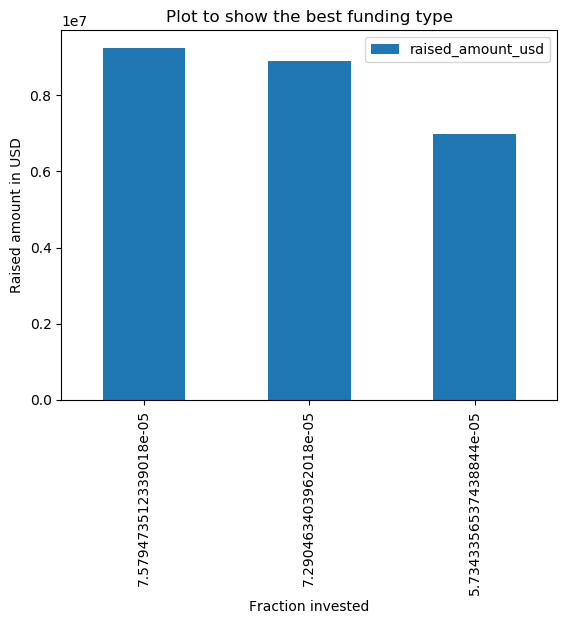

In [374]:
# Finally , plotting the raised_amount_usd_mean_y (Y axis) against the fraction_invested_array_x(X axis)
import matplotlib.pyplot as plt; plt.rcdefaults()
ax=groupedByfundingType.plot(kind='bar',x='fraction_invested',y='raised_amount_usd',title='Plot to show the best funding type')
ax.set_xlabel("Fraction invested")
ax.set_ylabel("Raised amount in USD")
plt.show()



### 6.2 - Plotting  Top 9 countries against the total amount of investments

In [377]:
#filtering the master_frame for venture type investments
df2=master_frame[master_frame.funding_round_type=='venture']

# group by country codes to compare the total funding amounts
country_wise_total=pd.DataFrame(df2.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False))

#make a dataframe top9_countries with the top nine countries 

top9_countries=country_wise_total.head(9)

In [384]:
# Identify the top 3 English speaking countries 

#getting english population data from wiki in order ['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
population=[True,False,True,True,True,False,True,False,False]

#Adding a column English Speaking population in the top9_countries dataframe

top9_countries['english_speaking_countries']=population
top9_countries['country_code']=top9_countries.index
#finding top 3 countries 
top3=top9_countries.sort_values(by='english_speaking_countries',ascending=False)
top3.head(3)

C:\Users\ybhatt2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ybhatt2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,raised_amount_usd,english_speaking_countries,country_code
country_code,,,
USA,8.960135e+10,True,USA
CHN,3.861561e+09,True,CHN
CAN,3.192010e+09,True,CAN


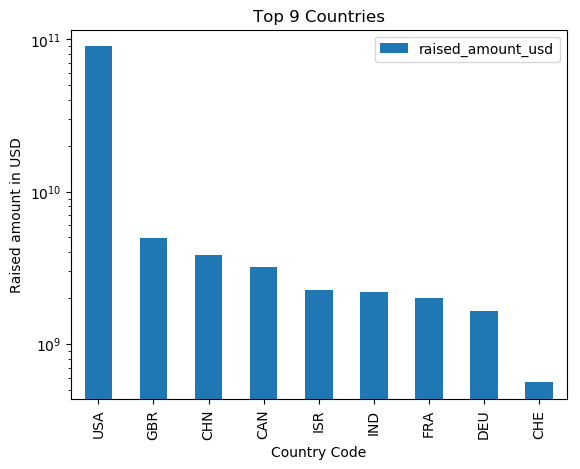

In [431]:


#Finally , plot the results

ax=top9_countries.plot(kind='bar',x='country_code',y='raised_amount_usd',title='Top 9 Countries',logy=True)
ax.set_xlabel("Country Code")
ax.set_ylabel("Raised amount in USD")
plt.show()

### 6.3 A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

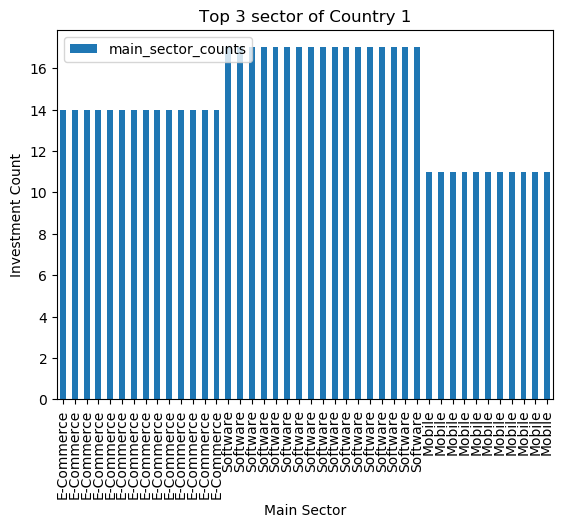

In [434]:
# Filtering the Dataframes D1, D2 , D3 to contain only venture type
import numpy as np


D4=D1[(D1.main_sector=='Software')|(D1.main_sector=='E-Commerce')|(D1.main_sector=='Mobile')]
D5=D2[(D2.main_sector=='Software')|(D2.main_sector=='E-Commerce')|(D2.main_sector=='Mobile')]
D6=D3[(D3.main_sector=='Software')|(D3.main_sector=='E-Commerce')|(D3.main_sector=='Mobile')]




ax=D4.plot(kind='bar',x='main_sector',y='main_sector_counts',title='Top 3 sector of Country 1')
ax.set_xlabel("Main Sector")
ax.set_ylabel("Investment Count")
plt.show()



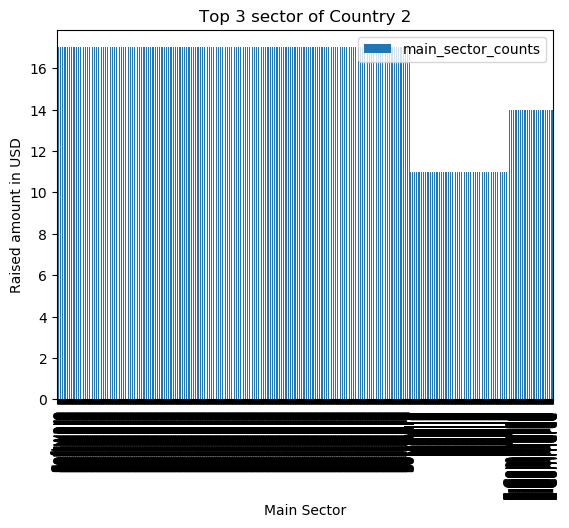

In [428]:

ax=D5.plot(kind='bar',x='main_sector',y='main_sector_counts',title='Top 3 sector of Country 2')
ax.set_xlabel("Main Sector")
ax.set_ylabel("Raised amount in USD")
plt.show()



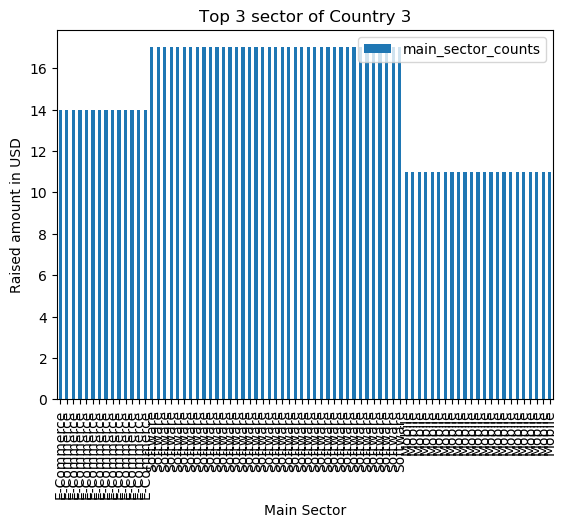

In [435]:

ax=D6.plot(kind='bar',x='main_sector',y='main_sector_counts',title='Top 3 sector of Country 3')
ax.set_xlabel("Main Sector")
ax.set_ylabel("Raised amount in USD")
plt.show()